In [26]:
#importing libraries 
library(glue)
library(tidyverse)

Giacomo Longaroni #2126898

In [27]:
# Ex 1, Ex 2
# import data and merging the five dataset into one dataframe 
path <- 'Data_CitiBike'
data <- read.csv(paste(path,'JC-201902-citibike-tripdata.csv', sep = '/'))

for (i in 3:6){
    data <- rbind(data, read.csv(paste(path,glue('JC-20190{i}-citibike-tripdata.csv'), sep='/')))
}

# visualizing the data 
head(data)

tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1
145,2019-02-01 17:32:53.2630,2019-02-01 17:35:18.7510,3183,Exchange Place,40.71625,-74.03346,3214,Essex Light Rail,40.71277,-74.03649,26153,Subscriber,1984,1


In [28]:
# Ex 3 
# checking for missing data 
print(paste('Count of total missing values in the dataframe:', sum(is.na(data))))
print(paste('Position of missing values in the dataframe:', which(is.na(data))))

[1] "Count of total missing values in the dataframe: 0"
[1] "Position of missing values in the dataframe: "


In [29]:
# Ex 4.1 
# computing avarage and median of trip duration in minutes
data$tripduration <- data$tripduration/60
mean_trip_minutes <- mean(data$tripduration)
median_trip_minutes <- median(data$tripduration)

print(paste('mean of trip duration in minutes:', round(mean_trip_minutes,2)))
print(paste('median of trip duration in minutes:', round(median_trip_minutes,2)))

[1] "mean of trip duration in minutes: 12.81"
[1] "median of trip duration in minutes: 5.68"


In [30]:
# Ex 4.2
# evaluating the minimum and maximum trip duration
max_trip_dur <- max(data$tripduration)
min_trip_dur <- min(data$tripduration)

print(paste('min of trip duration in minutes:', round(min_trip_dur,2)))
print(paste('max of trip duration in minutes:', max_trip_dur))
print('max duration seems strange')

[1] "min of trip duration in minutes: 1.02"
[1] "max of trip duration in minutes: 28817"


[1] "max duration seems strange"


In [31]:
# Ex 4.3
# masking the trip duration with 3 hour filter 
three_h = 60*3
filtered_data <- subset(data, data$tripduration <= three_h)
skimmed_entries <- (dim(data)[1]-dim(filtered_data)[1])

# recomputing the mean and median
mean_trip_minutes <- mean(filtered_data$tripduration)
median_trip_minutes <- median(filtered_data$tripduration)
print(paste('new mean of trip duration in minutes:', round(mean_trip_minutes,2)))
print(paste('new median of trip duration in minutes:', round(median_trip_minutes,2)))

# evaluating number of skimmed entries
print(paste('skimmed entries:', skimmed_entries))

# new min new max
print(paste('new min of trip duration in minutes:', round(min(filtered_data$tripduration),2)))
print(paste('new max of trip duration in minutes:', max(filtered_data$tripduration)))
print('max duration seems strange')

[1] "new mean of trip duration in minutes: 9.22"
[1] "new median of trip duration in minutes: 5.67"
[1] "skimmed entries: 427"
[1] "new min of trip duration in minutes: 1.02"
[1] "new max of trip duration in minutes: 180"
[1] "max duration seems strange"


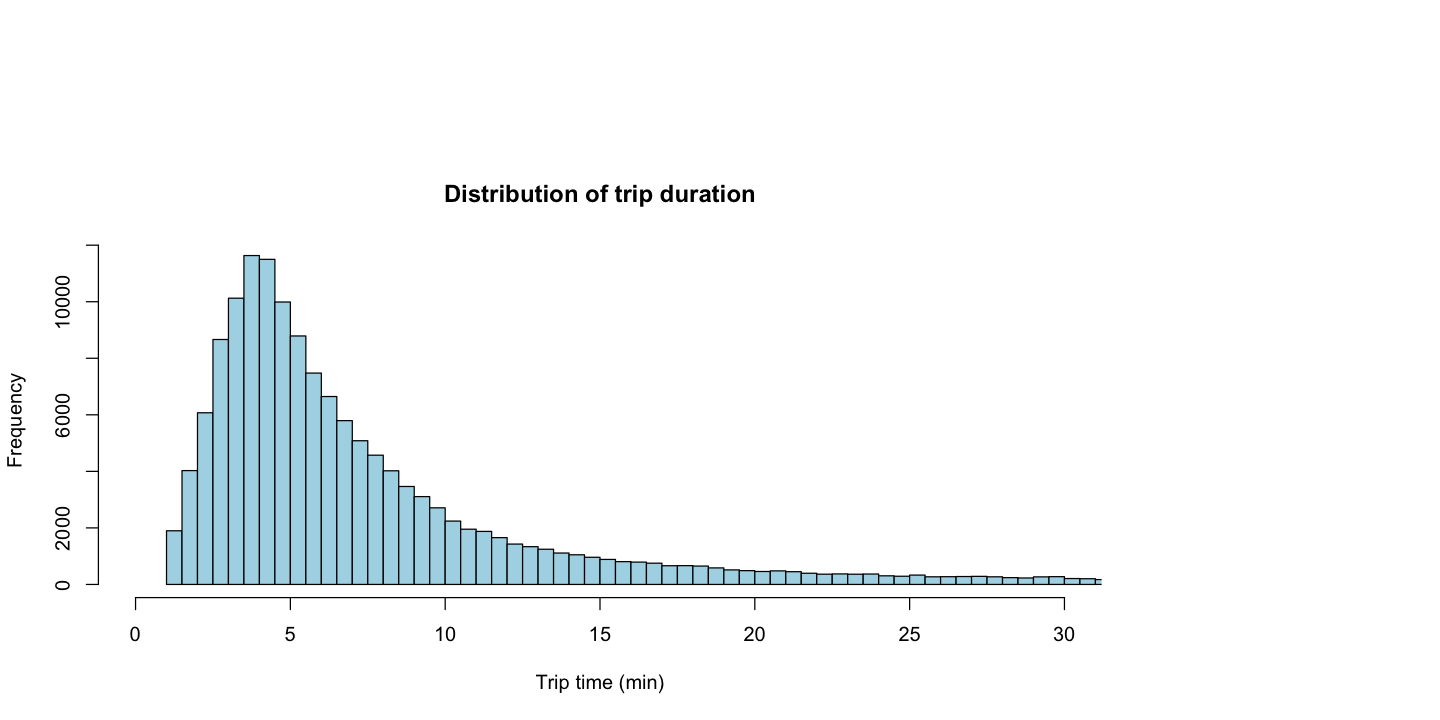

In [32]:
# Ex 4.4 
# plotting the distribution of trip duration after the filter 
par(fig=c(0, 0.8,  0,0.8))
hist(filtered_data$tripduration, 
     breaks = 400, xlim = c(0,30), 
     main = 'Distribution of trip duration', 
     xlab = 'Trip time (min)',
     col = 'light blue')

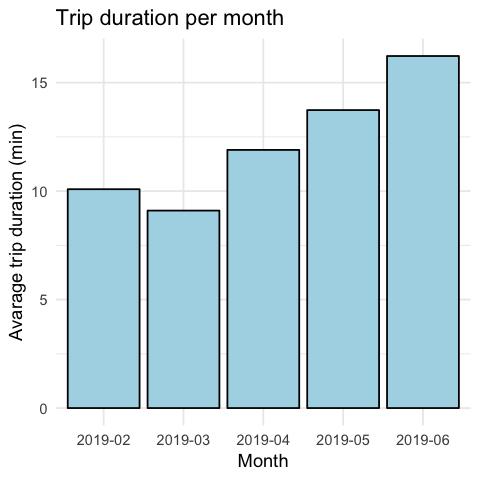

In [33]:
# Ex 5 
# plotting the monthly average trip duration
options(repr.plot.width = 4, repr.plot.height = 4)
month_mean_duration <- aggregate(data$tripduration, list(substr(data$starttime,1,7)), mean)
p<-ggplot(data=month_mean_duration, aes(x=Group.1, y=x)) +
  geom_bar(stat="identity", fill="light blue", color = 'black')+
  labs( x = "Month", y = "Avarage trip duration (min)", title = 'Trip duration per month' ) +
  theme_minimal()
p

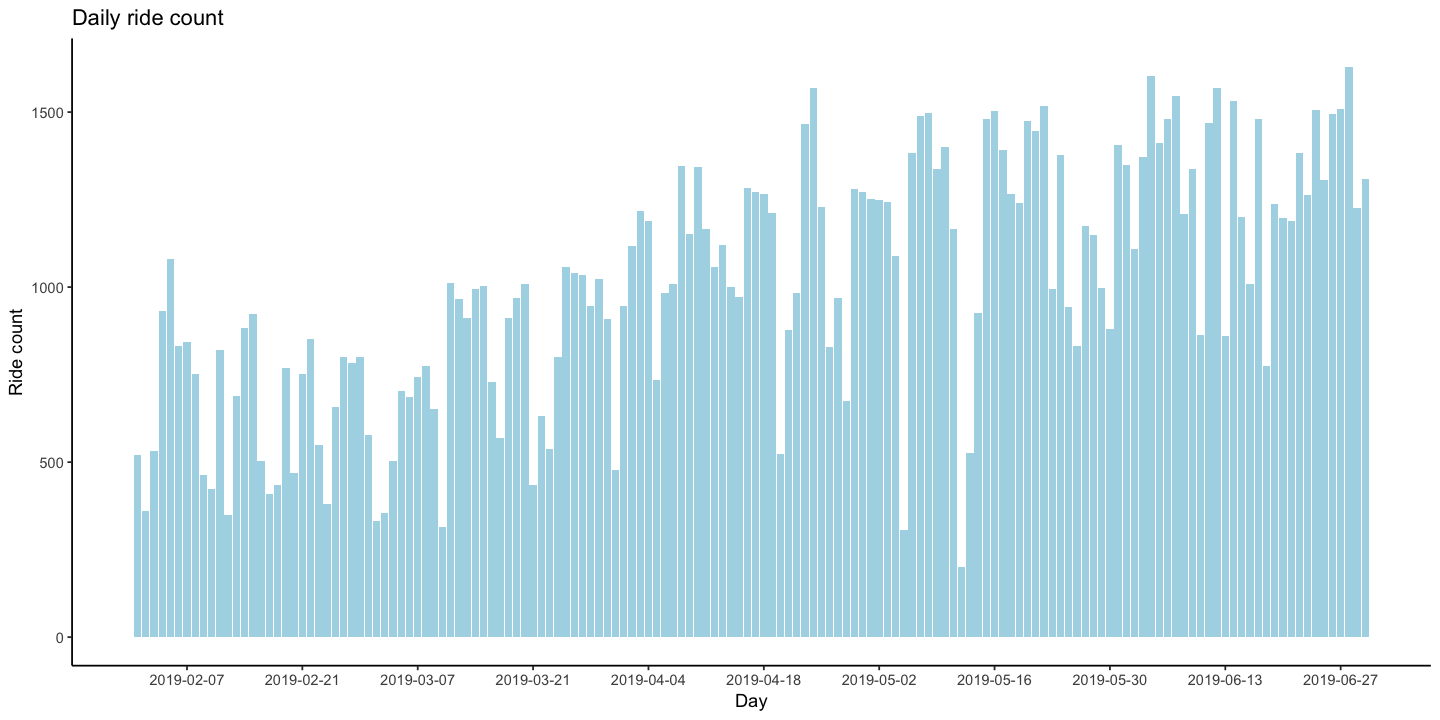

In [34]:
# Ex 6.1)
# Plotting Daily Ride count 

# aggregate data by date 
daily_ride <- aggregate(data$tripduration, by = list(Date = as.Date(substr(data$starttime, 1, 10))), FUN = length)
# new columns name 
colnames(daily_ride) <- c("Date", "RideCount")
# plotting
options(repr.plot.width = 12, repr.plot.height = 6)
p <- ggplot(data = daily_ride, aes(x = Date, y = RideCount)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "Day", y = "Ride count", title = 'Daily ride count') +
  scale_x_date(date_breaks = "14 days", date_labels = "%Y-%m-%d") +
  theme_classic()
p


In [35]:
# Ex 6.2
# plotting the hourly distribution on weekdays and on weekends

#creating new column with week days
data$weekday <- weekdays(as.POSIXct(data$starttime, format="%Y-%m-%d %H:%M:%S"))

#week dataset 
work_days_dataset <- data[data$weekday == c('Saturday', 'Sunday'), ]
weekend_dataset <- data[data$weekday != c('Saturday', 'Sunday'), ]

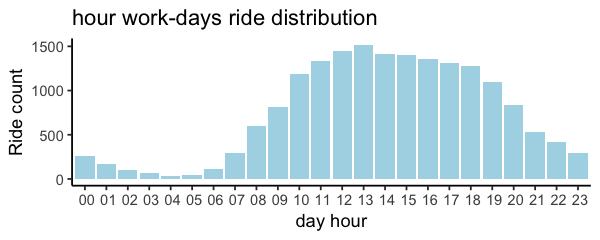

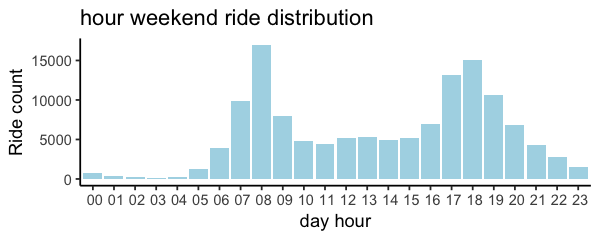

In [45]:
# work day hour distribution
work_day_hour <- aggregate(work_days_dataset$tripduration, by = list(Date = (substr(work_days_dataset$starttime, 11, 13))), FUN = length)
weekend_day_hour <- aggregate(weekend_dataset$tripduration, by = list(Date = (substr(weekend_dataset$starttime, 11, 13))), FUN = length)

options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = work_day_hour, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour work-days ride distribution') +
  theme_classic()
p

options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = weekend_day_hour, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour weekend ride distribution') +
  theme_classic()
p


In [36]:
# creating different datasets for the plots
work_days_dataset_sub <- work_days_dataset[work_days_dataset$usertype == 'Subscriber', ]
work_days_dataset_cus <- work_days_dataset[work_days_dataset$usertype == 'Customer', ]
weekend_dataset_sub <- weekend_dataset[weekend_dataset$usertype == 'Subscriber', ]
weekend_dataset_cus <- weekend_dataset[weekend_dataset$usertype == 'Customer', ]

work_day_hour_sub <- aggregate(work_days_dataset_sub$tripduration, by = list(Date = (substr(work_days_dataset_sub$starttime, 11, 13))), FUN = length)
work_day_hour_scus <- aggregate(work_days_dataset_cus$tripduration, by = list(Date = (substr(work_days_dataset_cus$starttime, 11, 13))), FUN = length)
weekend_day_hour_sub <- aggregate(weekend_dataset_sub$tripduration, by = list(Date = (substr(weekend_dataset_sub$starttime, 11, 13))), FUN = length)
weekend_day_hour_cus <- aggregate(weekend_dataset_cus$tripduration, by = list(Date = (substr(weekend_dataset_cus$starttime, 11, 13))), FUN = length)



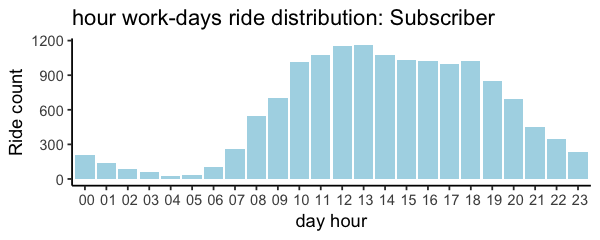

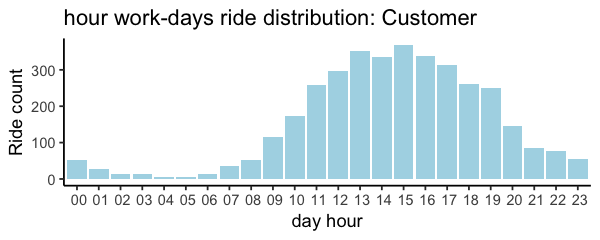

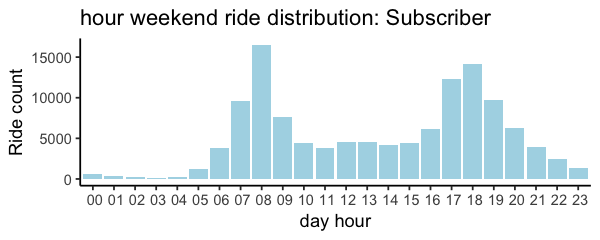

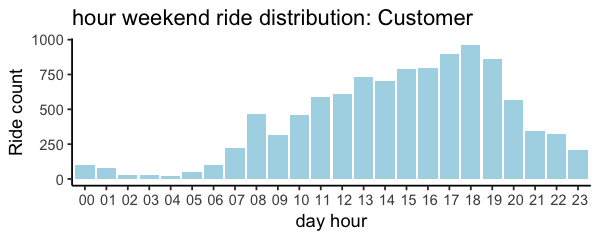

In [44]:
# Ex 6.3
# plots
options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = work_day_hour_sub, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour work-days ride distribution: Subscriber') +
  theme_classic()
p

options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = work_day_hour_scus, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour work-days ride distribution: Customer') +
  theme_classic()
p

options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = weekend_day_hour_sub, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour weekend ride distribution: Subscriber') +
  theme_classic()
p

options(repr.plot.width = 5, repr.plot.height = 2)
p <- ggplot(data = weekend_day_hour_cus, aes(x = Date, y = x)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "day hour", y = "Ride count", title = 'hour weekend ride distribution: Customer') +
  theme_classic()
p



In [38]:
# Ex 7.1 
# using the latitude and longitude information3, evaluate the average speed (in km/h) of a user, discarding the trip lasting longer than 1 hour

# adding columns for distance and velocity 
library(geosphere)
filterd_data <- data[data$tripduration < 3600,]
filterd_data$distance <- distHaversine(p1 = cbind(filterd_data$start.station.latitude, filterd_data$start.station.longitude), 
                                       p2 = cbind(filterd_data$end.station.latitude, filterd_data$end.station.longitude), 
                                       r = 6378137)
filterd_data$velocity <- filterd_data$distance/filterd_data$tripduration

# adding column for distance group
distance_groups <- c(0, 500, 1000, 2000, 3000, Inf)
distance_labels <- c("< 500 m", "500-1000 m", "1000-2000 m", "2000-3000 m", "> 3000 m")
filterd_data$distance_group <- cut(filterd_data$distance,
                                   breaks = distance_groups,
                                   labels = distance_labels,
                                   right = FALSE)

# adding column for day type 
filterd_data <- filterd_data %>%
  mutate(day_type = ifelse(weekday %in% c('Saturday', 'Sunday'), 'weekend', 'workday'))

head(filterd_data)


tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,weekday,distance,velocity,distance_group,day_type
2.366667,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1,Friday,126.14442,53.30046,< 500 m,workday
3.716667,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2,Friday,471.40816,126.83628,< 500 m,workday
1.766667,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1,Friday,65.17974,36.89419,< 500 m,workday
6.166667,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1,Friday,1439.07960,233.36426,1000-2000 m,workday
5.250000,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1,Friday,1062.18160,202.32030,1000-2000 m,workday
2.416667,2019-02-01 17:32:53.2630,2019-02-01 17:35:18.7510,3183,Exchange Place,40.71625,-74.03346,3214,Essex Light Rail,40.71277,-74.03649,26153,Subscriber,1984,1,Friday,353.33146,146.20612,< 500 m,workday


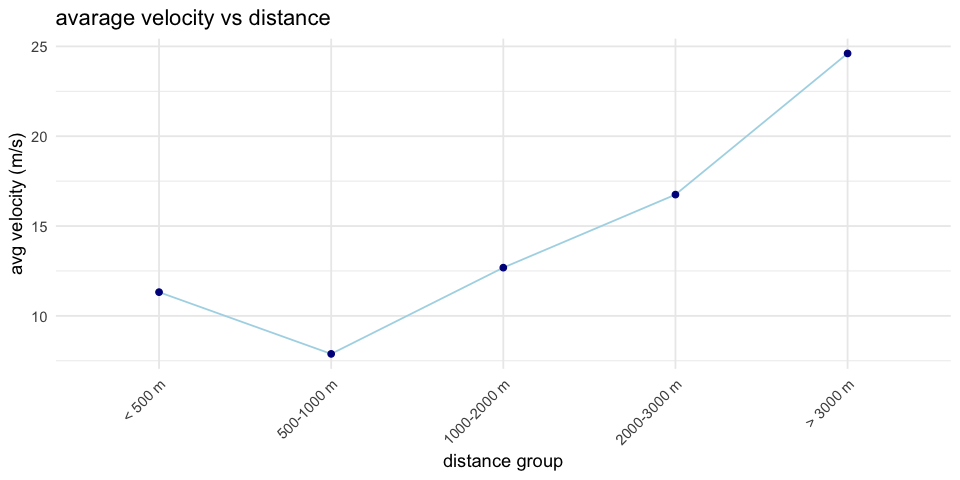

In [39]:
# Ex 7.2
avg_speed <- aggregate(filterd_data$tripduration, by = list( filterd_data$distance_group), FUN = mean)
colnames(avg_speed) <- c('Distance.group', 'avg.speed')

options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(avg_speed, aes(x = avg_speed$Distance.group, y = avg_speed$avg.speed)) +
  geom_line(group=1, color = 'light blue')+
  geom_point(color = 'dark blue')+
  labs(title = "avarage velocity vs distance",
       x = "distance group",
       y = "avg velocity (m/s)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# why velocity seems increase ???

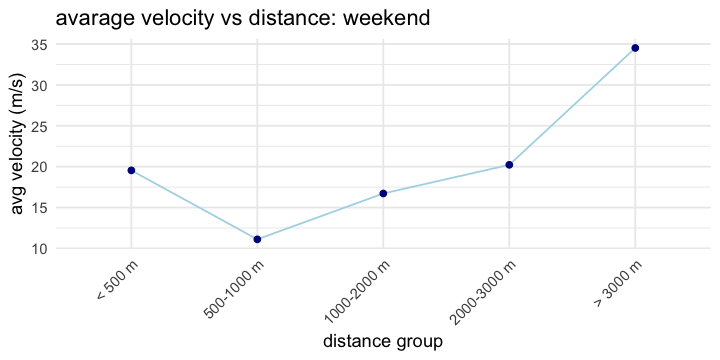

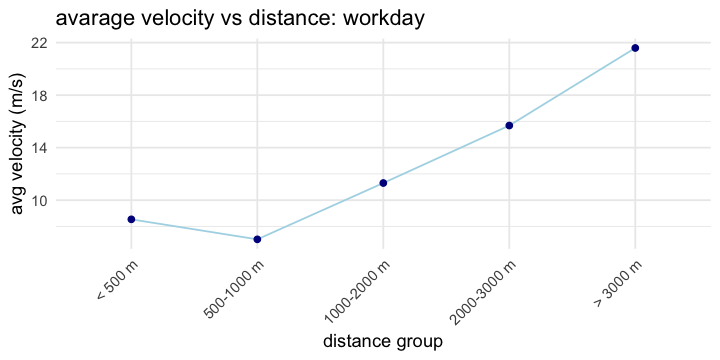

In [40]:
# Ex 7.3
# same plots for weekend and workdays
filterd_data_weekend <- filterd_data[filterd_data$day_type == 'weekend',]
filterd_data_workday <- filterd_data[filterd_data$day_type == 'workday',] 
avg_speed_weekend <- aggregate(filterd_data_weekend$tripduration, by = list( filterd_data_weekend$distance_group), FUN = mean)
avg_speed_workday <- aggregate(filterd_data_workday$tripduration, by = list( filterd_data_workday$distance_group), FUN = mean)
colnames(avg_speed_weekend) <- c('Distance.group', 'avg.speed')
colnames(avg_speed_workday) <- c('Distance.group', 'avg.speed')

options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(avg_speed_weekend, aes(x = avg_speed_weekend$Distance.group, y = avg_speed_weekend$avg.speed)) +
  geom_line(group=1, color = 'light blue')+
  geom_point(color = 'dark blue')+
  labs(title = "avarage velocity vs distance: weekend",
       x = "distance group",
       y = "avg velocity (m/s)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(avg_speed_workday, aes(x = avg_speed_workday$Distance.group, y = avg_speed_workday$avg.speed)) +
  geom_line(group=1, color = 'light blue')+
  geom_point(color = 'dark blue')+
  labs(title = "avarage velocity vs distance: workday",
       x = "distance group",
       y = "avg velocity (m/s)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [41]:
# Ex 8.1

# find the most popular start station and the least popular end station 
start_stations <- data.frame(table(filterd_data$start.station.name))
colnames(start_stations) <- c('station_name', 'freq')
end_stations <- data.frame(table(filterd_data$end.station.name))
colnames(end_stations) <- c('station_name', 'freq')

#printing the results
print('most frequent start station')
print(start_stations[start_stations$freq == max(start_stations$freq),])
print('least frequent end stations')
print(end_stations[end_stations$freq == min(end_stations$freq),])

[1] "most frequent start station"
    station_name  freq
18 Grove St PATH 17900
[1] "least frequent end stations"


               station_name freq
49          W 15 St & 6 Ave    1
55         W 20 St & 11 Ave    1
56          W 38 St & 8 Ave    1
57         W 56 St & 10 Ave    1
59       Broadway & W 56 St    1
61          E 33 St & 5 Ave    1
63    Spruce St & Nassau St    1
64         W 15 St & 10 Ave    1
65         W 27 St & 10 Ave    1
66          W 41 St & 8 Ave    1
74   Norfolk St & Broome St    1
75          1 Ave & E 16 St    1
76          8 Ave & W 52 St    1
83 South St & Gouverneur Ln    1
84          W 43 St & 6 Ave    1
85    West St & Chambers St    1


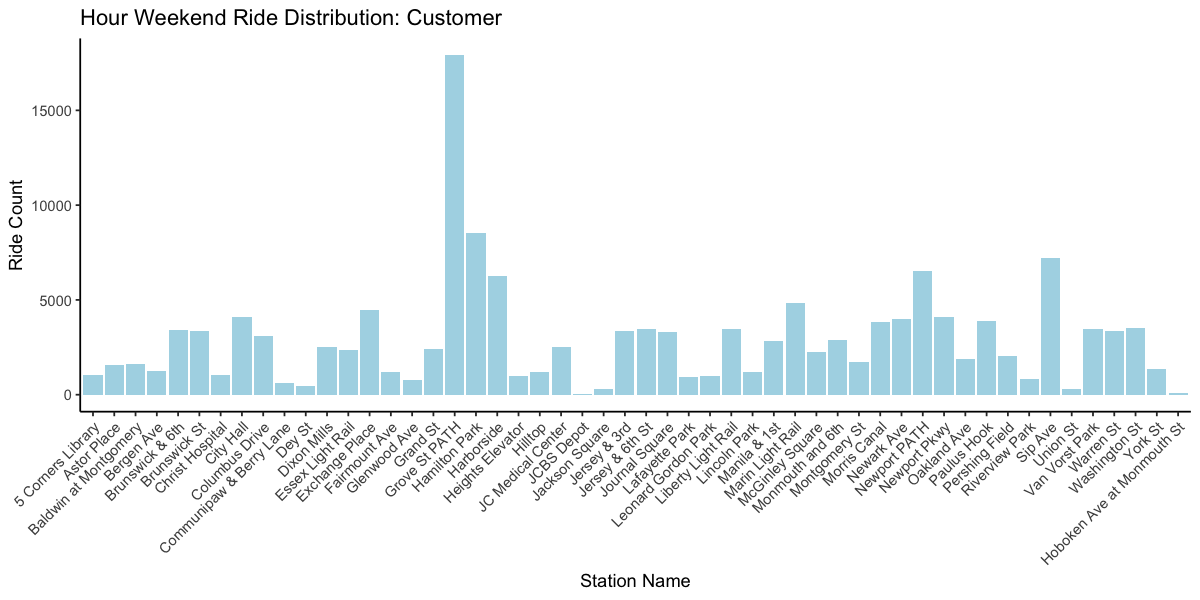

In [42]:
# Ex 8.2
options(repr.plot.width = 10, repr.plot.height = 5)
p <- ggplot(data = start_stations, aes(x = station_name, y = freq)) +
  geom_bar(stat = "identity", fill = "light blue") +
  labs(x = "Station Name", y = "Ride Count", title = 'Hour Weekend Ride Distribution: Customer') +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))  # Aggiungi questa linea per ruotare le etichette dell'asse X
p

In [43]:
# Ex 8.3
route <- paste(filtered_data$start.station.name, '-', filtered_data$end.station.name)
route <- data.frame(table(route))
colnames(route) <- c('route', 'freq')
route_sorted = route[order(route$freq, decreasing = TRUE),]

print('most popular route:')
print(head(route_sorted,3))

print('least popular route:')
print(tail(route_sorted,3))

[1] "most popular route:"
                              route freq
863   Hamilton Park - Grove St PATH 3037
814   Grove St PATH - Hamilton Park 2318
201 Brunswick & 6th - Grove St PATH 1915
[1] "least popular route:"
                                 route freq
2359         York St - Brunswick & 6th    1
2363 York St - Communipaw & Berry Lane    1
2381            York St - Lincoln Park    1
